EEG  based emotion analysis using DEAP dataset

1) Convert Data

In [1]:
import pickle

nLabel, nTrial, nUser, nChannel, nTime  = 4, 40, 32, 40, 8064
no_of_users=5
def convertData():
    print("Program started"+"\n")
    fout_data = open("data/features_raw.dat",'w')
    fout_labels0 = open("data/labels_0.dat",'w')
    fout_labels1 = open("data/labels_1.dat",'w')
    fout_labels2 = open("data/labels_2.dat",'w')
    fout_labels3 = open("data/labels_3.dat",'w')
    for i in range(no_of_users):  #nUser #4, 40, 32, 40, 8064 4 labels, 40 sample for each user, 32 such user, 40 electrode, 8064*40 features
        if(i%1 == 0):
            if i < 10:
                name = '%0*d' % (2,i+1)
            else:
                name = i+1
        fname = "data/s"+str(name)+".dat"     
        f = open(fname, 'rb')                 #Read the file in Binary mode
        x = pickle.load(f, encoding='latin1')
        print(fname)                          
    	
        for tr in range(nTrial):
            if(tr%1 == 0):
                for dat in range(nTime):
                    if(dat%32 == 0):
                        for ch in range(nChannel):
                            fout_data.write(str(x['data'][tr][ch][dat]) + " ");
                fout_labels0.write(str(x['labels'][tr][0]) + "\n");
                fout_labels1.write(str(x['labels'][tr][1]) + "\n");
                fout_labels2.write(str(x['labels'][tr][2]) + "\n");
                fout_labels3.write(str(x['labels'][tr][3]) + "\n");
                fout_data.write("\n");
    fout_labels0.close()
    fout_labels1.close()
    fout_labels2.close()
    fout_labels3.close()
    fout_data.close()
    print("\n"+"Print Successful")

if __name__ == '__main__':
    convertData()


Program started

data/s01.dat
data/s02.dat
data/s03.dat
data/s04.dat
data/s05.dat

Print Successful


2)Feature Sampled

In [2]:
import pickle

nLabel, nTrial, nUser, nChannel, nTime  = 4, 40, 32, 40, 8064  #10080/80=126*40=5040 features
no_of_users=5
def sampleFeatures():
    print("Program started"+"\n")
    fout_data = open('data/features_sampled.dat','w')
    for i in range(no_of_users):   #nUser  #4, 40, 32, 40, 8064
        if(i%1 == 0):
            if i < 10:			
                name = '%0*d' % (2,i+1)
            else:
                name = i+1		
            fname = "data/s"+str(name)+".dat"
            x = pickle.load(open(fname, 'rb'), encoding='latin1')		
            print(fname)		
            for tr in range(nTrial):			
                if(tr%1 == 0):				
                    for dat in range(nTime):					
                        if(dat%32 == 0 ):						
                            for ch in range(nChannel):							
                                fout_data.write(str(ch+1) + " ");							
                                fout_data.write(str(x['data'][tr][ch][dat]) + " ");			
                fout_data.write("\n");
    fout_data.close()
    print('Completed')

if __name__ == '__main__':
    sampleFeatures()

Program started

data/s01.dat
data/s02.dat
data/s03.dat
data/s04.dat
data/s05.dat
Completed


3) Visualize Dataset

Summary of dataset

1. Shape is:
(8064, 40)

2. First 8 rows are as:
         0         1         2         3         4         5         6   \
0  0.948232  0.124707 -2.216511  1.005734  5.095919  1.206457  3.866461   
1  1.653335  1.390083  2.292017  1.297927  5.000869  0.599485  3.280028   
2  3.013726  1.835099  2.746369  2.367689  4.176166  0.869299  0.656367   
3  1.495061 -1.110738 -2.364459 -0.231850  0.354056  1.974166 -3.077413   
4 -1.264836 -2.590622 -2.309528 -1.662444 -4.154098 -0.091352 -2.857734   
5 -1.969558 -1.844258 -0.668117 -0.014568 -3.980890 -3.139610 -0.102170   
6 -2.169066 -0.739794 -0.837056  0.736730 -0.553856 -1.927116  2.196924   
7 -0.215480  2.395738  3.654975  1.421469  1.402554  1.206019  3.132587   

         7         8         9     ...           30        31         32  \
0  1.861664  3.689008  1.319819    ...    -1.237332  0.372271   9.199039   
1  7.190648  4.701009 -3.853227    ...    -0.941383  2.076195   9.699038   
2  5.906498  1.712879 -6.44

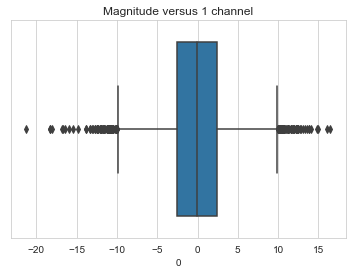

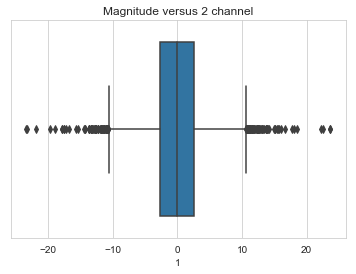

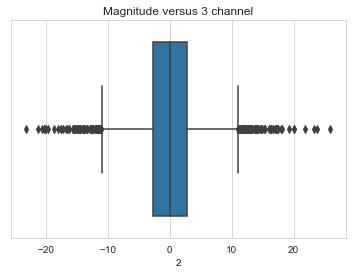

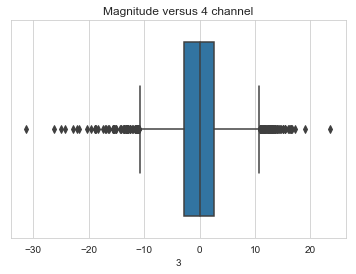

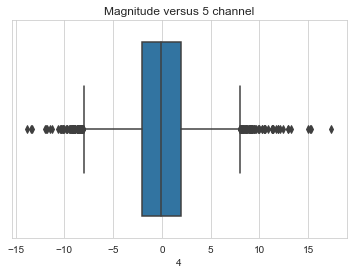

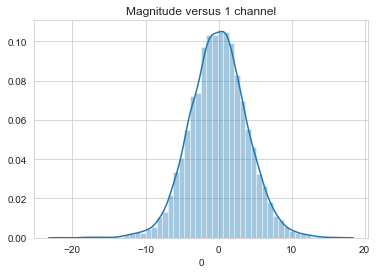

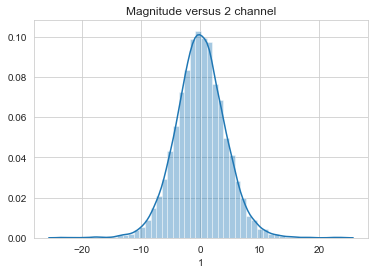

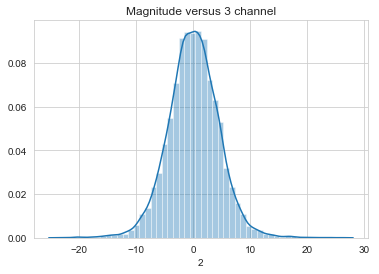

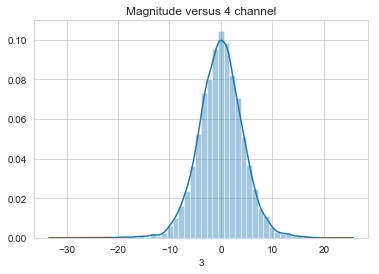

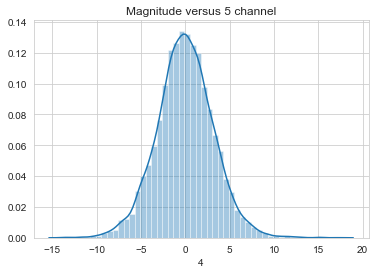

In [4]:
def data_visual():
    import pandas as pd
    import seaborn as sns
    from pandas.plotting import scatter_matrix
    import matplotlib.pyplot as plt
    import warnings
    
    warnings.filterwarnings("ignore")
    features = pd.read_csv('features.csv') 
    labels = pd.read_csv('labels.csv')

    names = ['valence', 'arousal', 'dominance', 'liking']
    dataset =features.transpose().reindex()


# Summary of dataset
    print('Summary of dataset\n')
# shape
    print('1. Shape is:')
    print(dataset.shape)
# head
    print('\n2. First 8 rows are as:')
    print(dataset.head(8))
# descriptions
    print('\n3. Statistical description:')
    print(dataset.describe())
    types = dataset.dtypes
    print('\n4. Data Types:')
    print(types)

# Data visualisation
# box and whisker plots
    for i in range(5):
        sns.set_style('whitegrid')
        sns.boxplot(dataset[i])
        plt.title('Magnitude versus ' + str(i+1) + ' channel')
        plt.show()
    
    import seaborn as sns
    from matplotlib import pyplot as plt
    for i in range(5):
        sns.distplot(dataset[i])
        plt.title('Magnitude versus ' + str(i+1) + ' channel')
        plt.show()
if __name__ == '__main__':
   data_visual()


4)Encoding Labels

In [5]:
def onehotencoding0():
    print("Program started"+"\n")
    fout_labels_class = open("data/label_class_0.dat",'w')
    
    with open('data/labels_0.dat','r') as f:
        for val in f:
            if float(val) > 4.5:
                fout_labels_class.write(str(1) + "\n");
            else:
                fout_labels_class.write(str(0) + "\n");
                
    print("Encoded label 0"+"\n")
if __name__ == '__main__':
    onehotencoding0()

Program started

Encoded label 0



In [6]:
def onehotencoding1():
    print("Program started"+"\n")
    fout_labels_class = open("data/label_class_1.dat",'w')
    
    with open('data/labels_1.dat','r') as f:
        for val in f:
            if float(val) > 4.5:
                fout_labels_class.write(str(1) + "\n");
            else:
                fout_labels_class.write(str(0) + "\n");
    print("Encoded label 1"+"\n")
if __name__ == '__main__':
    onehotencoding1()

Program started

Encoded label 1



In [9]:
def onehotencoding2():
    print("Program started"+"\n")
    fout_labels_class = open("data/label_class_2.dat",'w')
    
    with open('data/labels_2.dat','r') as f:
        for val in f:
            if float(val) > 4.5:
                fout_labels_class.write(str(1) + "\n");
            else:
                fout_labels_class.write(str(0) + "\n");
    print("Encoded label 2"+"\n")
if __name__ == '__main__':
    
    onehotencoding2()

Program started

Encoded label 2



In [10]:
def onehotencoding3():
    print("Program started"+"\n")
    fout_labels_class = open("data/label_class_3.dat",'w')
    
    with open('data/labels_3.dat','r') as f:
        for val in f:
            if float(val) > 4.5:
                fout_labels_class.write(str(1) + "\n");
            else:
                fout_labels_class.write(str(0) + "\n");
    print("Encoded label 3"+"\n")
if __name__ == '__main__':
    onehotencoding3()

Program started

Encoded label 3



5)Start Cross Validation

a) Cross Validation For LAbel -0 (Valence)

Model | Mean of CV | Std. Dev. of CV | Time
LR: 0.585714 (0.097416) 0.039992 s
SVC: 0.642857 (0.098457) 0.029999 s
KNN: 0.692857 (0.048445) 0.019998 s
DT: 0.528571 (0.128571) 0.039999 s
Model  | Mean of CV | Std. Dev. of CV | Time 1
KNN: 0.592857 (0.097677) 0.009996 s
Model  | Mean of CV | Std. Dev. of CV | Time 2
KNN: 0.535714 (0.031135) 0.019999 s
Model  | Mean of CV | Std. Dev. of CV | Time 3
KNN: 0.621429 (0.051010) 0.010000 s
Model  | Mean of CV | Std. Dev. of CV | Time 4
KNN: 0.621429 (0.051010) 0.029999 s
Model  | Mean of CV | Std. Dev. of CV | Time 5
KNN: 0.664286 (0.031135) 0.029997 s
Model  | Mean of CV | Std. Dev. of CV | Time 6
KNN: 0.607143 (0.073886) 0.009999 s
Model  | Mean of CV | Std. Dev. of CV | Time 7
KNN: 0.635714 (0.061859) 0.020000 s
Model  | Mean of CV | Std. Dev. of CV | Time 8
KNN: 0.571429 (0.045175) 0.010000 s
Model  | Mean of CV | Std. Dev. of CV | Time 9
KNN: 0.607143 (0.051010) 0.010000 s
Model  | Mean of CV | Std. Dev. of CV | Time 10
KNN: 0.571429 (0.05

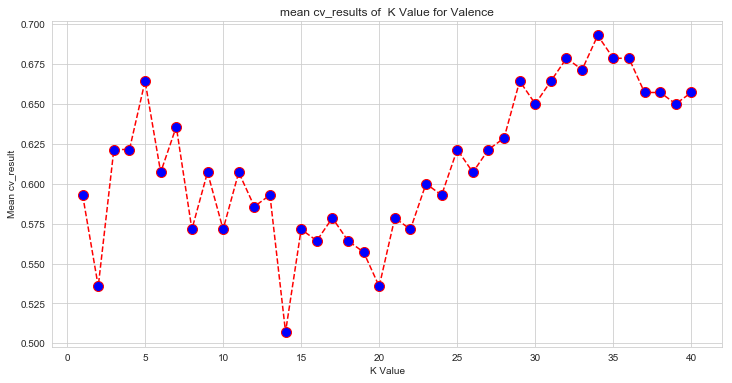

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def cross_validate0():
    
    # Get Data
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_0.dat'
    
    X = np.genfromtxt(file_x, delimiter=' ')
    y = np.genfromtxt(file_y, delimiter=' ')
    
   
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
     # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
     #principle component analysis
    from sklearn.decomposition import PCA
    pca = PCA(n_components=20)
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    
   
    	
    models = []
    models.append(('LR', LogisticRegression(random_state = 0)))
    models.append(('SVC', SVC(kernel = 'rbf', random_state = 0)))
     
    models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
    models.append(('DT', DecisionTreeClassifier(random_state = 0)))
    
    scoring = 'accuracy'
    
    # Cross Validate
    results = []
    names = []
    timer = []
    print('Model | Mean of CV | Std. Dev. of CV | Time')
    for name, model in models:
        start_time = time.time()
        kfold = model_selection.KFold(n_splits=5, random_state=0)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        t = (time.time() - start_time)
        timer.append(t)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
        print(msg)
    
        
    models = []
    for i in range(1,41): 
        models.append(('KNN', KNeighborsClassifier(n_neighbors=i)))
        results = []
        names = []
        timer = []
        cv_knn = []
        
        print('Model  | Mean of CV | Std. Dev. of CV | Time',i)
        for name, model in models:
            start_time = time.time()
            kfold = model_selection.KFold(n_splits=4, random_state=42)
            cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
            t = (time.time() - start_time)
            timer.append(t)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                
            cv_knn.append(cv_results.mean())
        print(msg)
        
    print('\nmaximum accuracy for valence is',max(cv_knn)*100)

    
    plt.figure(figsize=(12, 6))  
    plt.plot(range(1, 41), cv_knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
    plt.title('mean cv_results of  K Value for Valence')  
    plt.xlabel('K Value')  
    plt.ylabel('Mean cv_result')  
    
        
if __name__ == '__main__':
    cross_validate0()

b) Cross Validation For Label -1 (Arousal)

Model | Mean of CV | Std. Dev. of CV | Time
LR: 0.514286 (0.053452) 0.039997 s
SVC: 0.514286 (0.086307) 0.049997 s
KNN: 0.500000 (0.039123) 0.029994 s
DT: 0.614286 (0.061445) 0.039996 s
Model  | Mean of CV | Std. Dev. of CV | Time 1
KNN: 0.492857 (0.085714) 0.030000 s
Model  | Mean of CV | Std. Dev. of CV | Time 2
KNN: 0.450000 (0.112031) 0.029999 s
Model  | Mean of CV | Std. Dev. of CV | Time 3
KNN: 0.535714 (0.101015) 0.029998 s
Model  | Mean of CV | Std. Dev. of CV | Time 4
KNN: 0.542857 (0.120374) 0.019997 s
Model  | Mean of CV | Std. Dev. of CV | Time 5
KNN: 0.500000 (0.039123) 0.029998 s
Model  | Mean of CV | Std. Dev. of CV | Time 6
KNN: 0.507143 (0.079539) 0.019997 s
Model  | Mean of CV | Std. Dev. of CV | Time 7
KNN: 0.507143 (0.082685) 0.019998 s
Model  | Mean of CV | Std. Dev. of CV | Time 8
KNN: 0.485714 (0.114286) 0.019974 s
Model  | Mean of CV | Std. Dev. of CV | Time 9
KNN: 0.507143 (0.061445) 0.009998 s
Model  | Mean of CV | Std. Dev. of CV | Time 10
KNN: 0.507143 (0.10

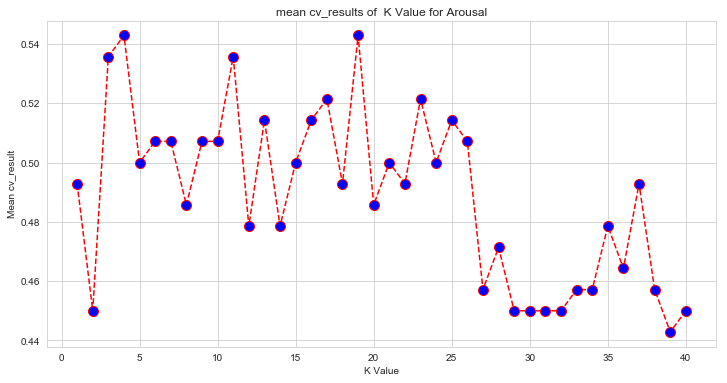

In [14]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def cross_validate1():
    
    # Get Data
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_1.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    X = StandardScaler().fit_transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
     #principle component analysis
    from sklearn.decomposition import PCA
    pca = PCA(n_components=20)
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
   
    models = []
    models.append(('LR', LogisticRegression(random_state = 42)))
    models.append(('SVC', SVC(kernel = 'rbf', random_state = 42)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
    models.append(('DT', DecisionTreeClassifier(random_state = 42)))
    
    scoring = 'accuracy'
    
    # Cross Validate
    results = []
    names = []
    timer = []
    print('Model | Mean of CV | Std. Dev. of CV | Time')
    for name, model in models:
        start_time = time.time()
        kfold = model_selection.KFold(n_splits=5, random_state=42)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        t = (time.time() - start_time)
        timer.append(t)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
        print(msg)
    
    models = []
    for i in range(1,41): 
        models.append(('KNN', KNeighborsClassifier(n_neighbors=i)))
        results = []
        names = []
        timer = []
        cv_knn = []
        
        print('Model  | Mean of CV | Std. Dev. of CV | Time',i)
        for name, model in models:
            start_time = time.time()
            kfold = model_selection.KFold(n_splits=5, random_state=42)
            cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
            t = (time.time() - start_time)
            timer.append(t)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                
            cv_knn.append(cv_results.mean())
        print(msg)
    print('\nmaximum accuracy for arousal  is',max(cv_knn)*100)
    plt.figure(figsize=(12, 6))  
    plt.plot(range(1,41), cv_knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
    plt.title('mean cv_results of  K Value for Arousal')  
    plt.xlabel('K Value')  
    plt.ylabel('Mean cv_result')  
        
if __name__ == '__main__':
    cross_validate1()

In [ ]:
c) Cross Validation For Label -2 (Dominance)

Model | Mean of CV | Std. Dev. of CV | Time
LR: 0.550000 (0.114286) 0.050000 s
SVC: 0.542857 (0.072843) 0.059990 s
KNN: 0.592857 (0.036422) 0.019998 s
DT: 0.557143 (0.066240) 0.029995 s
Model  | Mean of CV | Std. Dev. of CV | Time 1
KNN: 0.564286 (0.041650) 0.030005 s
Model  | Mean of CV | Std. Dev. of CV | Time 2
KNN: 0.585714 (0.073540) 0.029987 s
Model  | Mean of CV | Std. Dev. of CV | Time 3
KNN: 0.542857 (0.091473) 0.019998 s
Model  | Mean of CV | Std. Dev. of CV | Time 4
KNN: 0.535714 (0.112938) 0.019996 s
Model  | Mean of CV | Std. Dev. of CV | Time 5
KNN: 0.592857 (0.036422) 0.029995 s
Model  | Mean of CV | Std. Dev. of CV | Time 6
KNN: 0.592857 (0.058029) 0.029996 s
Model  | Mean of CV | Std. Dev. of CV | Time 7
KNN: 0.614286 (0.072843) 0.020000 s
Model  | Mean of CV | Std. Dev. of CV | Time 8
KNN: 0.585714 (0.053452) 0.029995 s
Model  | Mean of CV | Std. Dev. of CV | Time 9
KNN: 0.557143 (0.073540) 0.020002 s
Model  | Mean of CV | Std. Dev. of CV | Time 10
KNN: 0.550000 (0.04

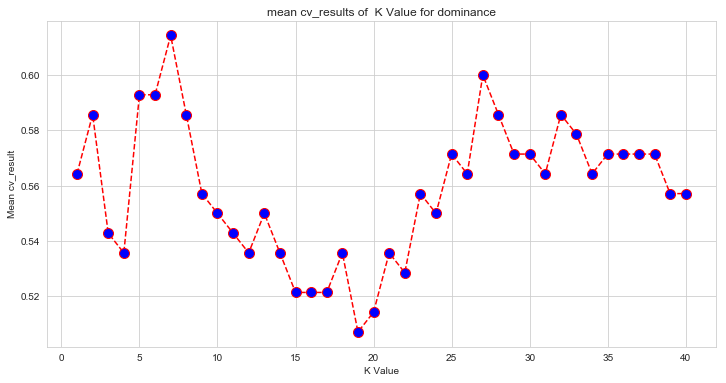

In [15]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def cross_validate2():
    
    # Get Data
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_2.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    X = StandardScaler().fit_transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
   
    
     #principle component analysis
    from sklearn.decomposition import PCA
    pca = PCA(n_components=20)
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    
    
    	
    models = []
    models.append(('LR', LogisticRegression(random_state = 42)))
    models.append(('SVC', SVC(kernel = 'rbf', random_state = 42)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
    models.append(('DT', DecisionTreeClassifier(random_state =42)))
    
    scoring = 'accuracy'
    
    # Cross Validate
    results = []
    names = []
    timer = []
    print('Model | Mean of CV | Std. Dev. of CV | Time')
    for name, model in models:
        start_time = time.time()
        kfold = model_selection.KFold(n_splits=5, random_state=42)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        t = (time.time() - start_time)
        timer.append(t)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
        print(msg)
    
        models = []
    for i in range(1,41): 
        models.append(('KNN', KNeighborsClassifier(n_neighbors=i)))
        results = []
        names = []
        timer = []
        cv_knn = []
        
        print('Model  | Mean of CV | Std. Dev. of CV | Time',i)
        for name, model in models:
            start_time = time.time()
            kfold = model_selection.KFold(n_splits=5, random_state=42)
            cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
            t = (time.time() - start_time)
            timer.append(t)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                
            cv_knn.append(cv_results.mean())
        print(msg)
    print('\nmaximum accuracy for dominance is',max(cv_knn)*100)
    plt.figure(figsize=(12, 6))  
    plt.plot(range(1,41), cv_knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
    plt.title('mean cv_results of  K Value for dominance')  
    plt.xlabel('K Value')  
    plt.ylabel('Mean cv_result')  
        
if __name__ == '__main__':
    cross_validate2()

d) Cross Validation For Label -3 (Liking)

Model | Mean of CV | Std. Dev. of CV | Time
LR: 0.714286 (0.074915) 0.049994 s
SVC: 0.778571 (0.047380) 0.050008 s
KNN: 0.764286 (0.036422) 0.039981 s
DT: 0.685714 (0.061445) 0.040002 s
Model  | Mean of CV | Std. Dev. of CV | Time 1
KNN: 0.664286 (0.028571) 0.029997 s
Model  | Mean of CV | Std. Dev. of CV | Time 2
KNN: 0.614286 (0.061445) 0.019995 s
Model  | Mean of CV | Std. Dev. of CV | Time 3
KNN: 0.750000 (0.039123) 0.019990 s
Model  | Mean of CV | Std. Dev. of CV | Time 4
KNN: 0.750000 (0.050508) 0.059991 s
Model  | Mean of CV | Std. Dev. of CV | Time 5
KNN: 0.764286 (0.036422) 0.029993 s
Model  | Mean of CV | Std. Dev. of CV | Time 6
KNN: 0.757143 (0.034993) 0.020000 s
Model  | Mean of CV | Std. Dev. of CV | Time 7
KNN: 0.771429 (0.048445) 0.019999 s
Model  | Mean of CV | Std. Dev. of CV | Time 8
KNN: 0.771429 (0.036422) 0.049986 s
Model  | Mean of CV | Std. Dev. of CV | Time 9
KNN: 0.778571 (0.047380) 0.019996 s
Model  | Mean of CV | Std. Dev. of CV | Time 10
KNN: 0.778571 (0.04

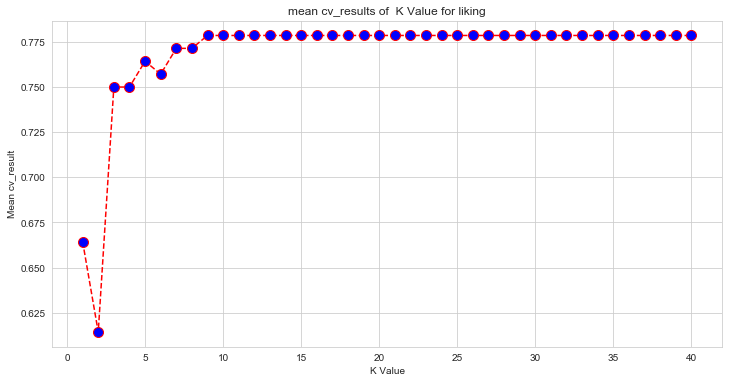

In [16]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def cross_validate3():
    
    # Get Data
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_3.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
   #X = StandardScaler().fit_transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
     # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    #principle component analysis
    from sklearn.decomposition import PCA
    pca = PCA(n_components=20)
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    
   
    	
    models = []
    models.append(('LR', LogisticRegression(random_state = 42)))
    models.append(('SVC', SVC(kernel = 'rbf', random_state = 42)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
    models.append(('DT', DecisionTreeClassifier(random_state = 42)))
    
    scoring = 'accuracy'
    
    # Cross Validate
    results = []
    names = []
    timer = []
    print('Model | Mean of CV | Std. Dev. of CV | Time')
    for name, model in models:
        start_time = time.time()
        kfold = model_selection.KFold(n_splits=5, random_state=42)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        t = (time.time() - start_time)
        timer.append(t)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
        print(msg)
    
    models = []
    for i in range(1,41): 
        models.append(('KNN', KNeighborsClassifier(n_neighbors=i)))
        results = []
        names = []
        timer = []
        cv_knn = []
        
        print('Model  | Mean of CV | Std. Dev. of CV | Time',i)
        for name, model in models:
            start_time = time.time()
            kfold = model_selection.KFold(n_splits=5, random_state=42)
            cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
            t = (time.time() - start_time)
            timer.append(t)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                
            cv_knn.append(cv_results.mean())
        print(msg)
    print('\nmaximum accuracy for liking is',max(cv_knn)*100)
    plt.figure(figsize=(12, 6))  
    plt.plot(range(1, 41), cv_knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
    plt.title('mean cv_results of  K Value for liking')  
    plt.xlabel('K Value')  
    plt.ylabel('Mean cv_result')  
        
if __name__ == '__main__':
    cross_validate3()

6) Applying Simple KNN Classifier

In [23]:
import numpy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def knn_classifier():
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_0.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # KNN
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    
    ###############################################################################
    
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_1.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # KNN
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    ###############################################################################
    
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_2.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # KNN
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of Dominance ")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    ###############################################################################
    
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_3.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # KNN
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of Liking ")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    
       
    
if __name__ == '__main__':
    knn_classifier()


[[12  7]
 [14  7]]
Accuracy score of Valence 
47.5
[[15 15]
 [11 19]]
Accuracy score of Arousal 
56.666666666666664
[[15 11]
 [17 17]]
Accuracy score of Dominance 
53.333333333333336
[[ 0 20]
 [ 0 40]]
Accuracy score of Liking 
66.66666666666666


7)Simple SVM Classification

In [25]:
import numpy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def svm_classifier(): 
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_0.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 42)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    ###############################################################
    
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_1.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 42)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    ####################################################################
    
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_2.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 42)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of Dominance ")
    print(accuracy_score(y_test, y_predict)*100)
    
    ######################################################################3
    
    file_x = 'data/features_sampled.dat'
    file_y = 'data/label_class_3.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 42)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of liking  ")
    print(accuracy_score(y_test, y_predict)*100)
    
if __name__ == '__main__':
    svm_classifier()

[[ 0 19]
 [ 0 21]]
Accuracy score of Valence 
52.5
[[ 5 14]
 [ 1 20]]
Accuracy score of Arousal 
62.5
[[ 6 13]
 [ 5 16]]
Accuracy score of Dominance 
55.00000000000001
[[ 0 13]
 [ 0 27]]
Accuracy score of liking  
67.5


8)KNN with PCA classification

In [26]:
import numpy
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def knn_classifier_pca():
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_0.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
           
    # PCA to select features
    pca = PCA(n_components=20, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
       	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    print("Accuracy score of valence test KNN-PCA")
    
    print(accuracy_score(y_test, y_predict)*100)
    
    
    ########################################################################
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_1.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
        
    # PCA to select features
    pca = PCA(n_components=20, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
        	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    print("Accuracy score of Arousal test KNN-PCA")
    print(accuracy_score(y_test, y_predict)*100)
        
    ##########################################################################33
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_2.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
       
    # PCA to select features
    pca = PCA(n_components=20, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
       	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    print("Accuracy score of Dominance test KNN-PCA")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    ######################################################################
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_3.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
       
    # PCA to select features
    pca = PCA(n_components=20, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
       	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    print("Accuracy score of Liking test KNN-PCA")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    
if __name__ == '__main__':
    knn_classifier_pca()

[[14  5]
 [14  7]]
Accuracy score of valence test KNN-PCA
52.5
[[10  9]
 [ 6 15]]
Accuracy score of Arousal test KNN-PCA
62.5
[[12  7]
 [ 9 12]]
Accuracy score of Dominance test KNN-PCA
60.0
[[ 0 13]
 [ 0 27]]
Accuracy score of Liking test KNN-PCA
67.5


9)SVM with PCA classification

In [27]:
import numpy
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

 
def svm_classifier_pca():
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_0.dat'
    print("LABEL 0 - Valence \n ")
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    print("Split the data into training/testing sets \n")
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.20, random_state=42)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=20, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0, y_predict_0)
    print(cm)
    print("Accuracy score of Valence SVM-PCA")
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
    #######################################################################
    
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_1.dat'
    print("LABEL 1 - Arousal \n ")
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    print("Split the data into training/testing sets \n")
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.20, random_state=42)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=20, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0, y_predict_0)
    print(cm)
    print("Accuracy score of Arousal SVM-PCA")
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
    #######################################################################
    
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_2.dat'
    print("LABEL 2 - Dominance \n ")
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    print("Split the data into training/testing sets \n")
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.20, random_state=42)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=20, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0, y_predict_0)
    print(cm)
    print("Accuracy score of Dominance SVM-PCA")
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
    #######################################################################
    
    
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_0.dat'
    print("LABEL 3 - Liking \n ")
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    print("Split the data into training/testing sets \n")
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.20, random_state=42)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=20, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0, y_predict_0)
    print(cm)
    print("Accuracy score of Liking SVM-PCA")
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
   
if __name__ == '__main__':
    svm_classifier_pca()

LABEL 0 - Valence 
 
Split the data into training/testing sets 

Feature Scaling 

Applying PCA to select features 

Applying SVM classifier 

[[ 0 19]
 [ 0 21]]
Accuracy score of Valence SVM-PCA
52.5
LABEL 1 - Arousal 
 
Split the data into training/testing sets 

Feature Scaling 

Applying PCA to select features 

Applying SVM classifier 

[[ 5 14]
 [ 4 17]]
Accuracy score of Arousal SVM-PCA
55.00000000000001
LABEL 2 - Dominance 
 
Split the data into training/testing sets 

Feature Scaling 

Applying PCA to select features 

Applying SVM classifier 

[[ 9 10]
 [10 11]]
Accuracy score of Dominance SVM-PCA
50.0
LABEL 3 - Liking 
 
Split the data into training/testing sets 

Feature Scaling 

Applying PCA to select features 

Applying SVM classifier 

[[ 0 19]
 [ 0 21]]
Accuracy score of Liking SVM-PCA
52.5


10)KNN with LDA classification

In [28]:
import numpy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings


def knn_classifier_lda():
    warnings.filterwarnings("ignore")
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_0.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #linear discriminant analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
       	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    print("Accuracy score of valence test KNN-LDA")
    
    print(accuracy_score(y_test, y_predict)*100)
    
    
    ########################################################################3
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_1.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #linear discriminant analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
        	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    print("Accuracy score of Arousal test KNN-LDA")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    ##########################################################################
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_2.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #linear discriminant analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
           	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    print("Accuracy score of Dominance test KNN-LDA")
    print(accuracy_score(y_test, y_predict)*100)
       
    ######################################################################
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_3.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #linear discriminant analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
       
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    print("Accuracy score of Liking test KNN-LDA")
    print(accuracy_score(y_test, y_predict)*100)
       
    
if __name__ == '__main__':
    knn_classifier_lda()

[[13  6]
 [ 1 20]]
Accuracy score of valence test KNN-LDA
82.5
[[13  6]
 [ 4 17]]
Accuracy score of Arousal test KNN-LDA
75.0
[[16  3]
 [ 2 19]]
Accuracy score of Dominance test KNN-LDA
87.5
[[ 7  6]
 [ 2 25]]
Accuracy score of Liking test KNN-LDA
80.0


11)SVM with LDA and RandomizedSearchCV classification

In [29]:
import numpy
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
import warnings

 
def svm_classifier_lda_rscv():
    warnings.filterwarnings("ignore")
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_0.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #linear discriminant analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
    
    # Tune algorithm
    pipeline = make_pipeline(SVC(random_state=42))
    
    hyperparameters = { 'svc__kernel' : ['poly', 'rbf','sigmoid'],
                      'svc__tol': [1e-3, 1e-1]}
    
    # SVM Classifier
    print('Started RandomizedSearchCV')
    clf = RandomizedSearchCV(pipeline, hyperparameters,n_iter=5, cv=5, scoring = 'accuracy')
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print("MSE for RandomizedSearchCV: {}". format(accuracy_score(y_test, y_predict)*100))
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    #####################################################################################
    
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_1.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #linear discriminant analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
    
    # Tune algorithm
    pipeline = make_pipeline(SVC(random_state=42))
    
    hyperparameters = { 'svc__kernel' : ['poly', 'rbf','sigmoid'],
                      'svc__tol': [1e-3, 1e-1]}
    
    # SVM Classifier
    print('Started RandomizedSearchCV')
    clf = RandomizedSearchCV(pipeline, hyperparameters,n_iter=5, cv=5, scoring = 'accuracy')
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print("MSE for RandomizedSearchCV: {}". format(accuracy_score(y_test, y_predict)*100))
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    #####################################################################################
    
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_2.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
      
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #linear discriminant analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
    
    # Tune algorithm
    pipeline = make_pipeline(SVC(random_state=42))
    
    hyperparameters = { 'svc__kernel' : ['poly', 'rbf','sigmoid'],
                      'svc__tol': [1e-3, 1e-1]}
    
    # SVM Classifier
    print('Started RandomizedSearchCV')
    clf = RandomizedSearchCV(pipeline, hyperparameters,n_iter=5, cv=5, scoring = 'accuracy')
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print("MSE for RandomizedSearchCV: {}". format(accuracy_score(y_test, y_predict)*100))
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    
    #####################################################################################
    
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_3.dat'
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #linear discriminant analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
    
    # Tune algorithm
    pipeline = make_pipeline(SVC(random_state=42))
    
    hyperparameters = { 'svc__kernel' : ['poly', 'rbf','sigmoid'],
                      'svc__tol': [1e-3, 1e-1]}
    
    # SVM Classifier
    print('Started RandomizedSearchCV')
    clf = RandomizedSearchCV(pipeline, hyperparameters,n_iter=5, cv=5, scoring = 'accuracy')
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print("MSE for RandomizedSearchCV: {}". format(accuracy_score(y_test, y_predict)*100))
    cm = confusion_matrix(y_test, y_predict)
    print(cm)

if __name__ == '__main__':
    svm_classifier_lda_rscv()

Started RandomizedSearchCV
MSE for RandomizedSearchCV: 90.0
[[17  2]
 [ 2 19]]
Started RandomizedSearchCV
MSE for RandomizedSearchCV: 77.5
[[11  8]
 [ 1 20]]
Started RandomizedSearchCV
MSE for RandomizedSearchCV: 80.0
[[14  5]
 [ 3 18]]
Started RandomizedSearchCV
MSE for RandomizedSearchCV: 87.5
[[10  3]
 [ 2 25]]


12)SVM with LDA classification

In [30]:
import numpy
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import warnings

 
def svm_classifier_lda():
    warnings.filterwarnings("ignore")
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_0.dat'
    print("LABEL 0 - Valence \n ")
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    print("Split the data into training/testing sets \n")
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.20, random_state=42)
    
       
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    print("Applying linear discriminant analysis \n")
    
    #linear discriminant analysis
            
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test_0)
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0, y_predict_0)
    print(cm)
    print("Accuracy score of Valence SVM ")
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
    #####################################################3
    y_test_0_file = open("data/y_test_0.dat",'w')
    for i in range(len(y_test_0)):
        y_test_0_file.write(str(y_test_0[i]) + "\n")
    y_test_0_file.close()
        
          
    y_predict_0_file = open("data/y_predict_0.dat",'w')
    for i in range(len(y_test_0)):
        y_predict_0_file.write(str(y_predict_0[i]) + "\n")
    y_predict_0_file.close()
        
    #######################################################################
    
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_1.dat'
    print("\n")
    print("LABEL 1 - Arousal \n ")
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    print("Split the data into training/testing sets \n")
    X_train, X_test, y_train, y_test_1 = train_test_split(X, y, test_size=0.20, random_state=42)
    
      
    # Feature Scaling
    print("Feature Scaling \n")
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #linear discriminant analysis
    print("Applying linear discriminant analysis \n")
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test_1)
    
        
    # SVM Classifier
    print("Applying SVM classifier \n")
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_1 = clf.predict(X_test)
    cm = confusion_matrix(y_test_1, y_predict_1)
    print(cm)
    print("Accuracy score of Arousal SVM ")
    print(accuracy_score(y_test_1, y_predict_1)*100)
    
    #######################################################
    y_test_1_file = open("data/y_test_1.dat",'w')
    for i in range(len(y_test_0)):
        y_test_1_file.write(str(y_test_1[i]) + "\n")
        
    y_test_1_file.close()
    
         
          
    y_predict_1_file = open("data/y_predict_1.dat",'w')
    for i in range(len(y_test_0)):
        y_predict_1_file.write(str(y_predict_1[i]) + "\n")
    y_predict_1_file.close()
    
    ##########################################################
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_2.dat'
    print("\n")
    print("LABEL 2 - Dominance \n ")
    
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    print("Split the data into training/testing sets \n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
      
    # Feature Scaling
    print("Feature Scaling \n")
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #linear discriminant analysis
    print("Applying linear discriminant analysis \n")
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
    
    # SVM Classifier
    print("Applying SVM classifier \n")
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of Dominance SVM ")
    print(accuracy_score(y_test, y_predict)*100)
    
    ##########################################################3
    file_x = 'data/features_raw.dat'
    file_y = 'data/label_class_3.dat'
    print("\n")
    print("LABEL 3 - Liking \n ")
    X = numpy.genfromtxt(file_x, delimiter=' ')
    y = numpy.genfromtxt(file_y, delimiter=' ')
    
    # Split the data into training/testing sets
    print("Split the data into training/testing sets \n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
       
    # Feature Scaling
    print("Feature Scaling \n")
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #linear discriminant analysis
    print("Applying linear discriminant analysis \n")
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=6)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.fit_transform(X_test,y_test)
    
        
    # SVM Classifier
    print("Applying SVM classifier \n")
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score of Liking SVM ")
    print(accuracy_score(y_test, y_predict)*100)


if __name__ == '__main__':
    svm_classifier_lda()

LABEL 0 - Valence 
 
Split the data into training/testing sets 

Feature Scaling 

Applying linear discriminant analysis 

Applying SVM classifier 

[[17  2]
 [ 2 19]]
Accuracy score of Valence SVM 
90.0


LABEL 1 - Arousal 
 
Split the data into training/testing sets 

Feature Scaling 

Applying linear discriminant analysis 

Applying SVM classifier 

[[16  3]
 [ 3 18]]
Accuracy score of Arousal SVM 
85.0


LABEL 2 - Dominance 
 
Split the data into training/testing sets 

Feature Scaling 

Applying linear discriminant analysis 

Applying SVM classifier 

[[16  3]
 [ 0 21]]
Accuracy score of Dominance SVM 
92.5


LABEL 3 - Liking 
 
Split the data into training/testing sets 

Feature Scaling 

Applying linear discriminant analysis 

Applying SVM classifier 

[[10  3]
 [ 2 25]]
Accuracy score of Liking SVM 
87.5


13)Applying Russell circumplex model for emotion

In [31]:


def Russell_circumplex():
    yy_test_0=[]
    
    with open('data/y_test_0.dat','r') as f:
        for val in f:
            
            if str(val) == '0.0\n':
                yy_test_0.append(0)
            if str(val) == '1.0\n':
                yy_test_0.append(1)
                
    f.close()
        
    yy_test_1=[]
    
    with open('data/y_test_1.dat','r') as f:
        for val in f:
            if str(val) == '0.0\n':
                yy_test_1.append(0)
            if str(val) == '1.0\n':
                yy_test_1.append(1)
    f.close()
        
    yy_predict_0=[]
    
    with open('data/y_predict_0.dat','r') as f:
        for val in f:
            if str(val) == '0.0\n':
                yy_predict_0.append(0)
            if str(val) == '1.0\n':
                yy_predict_0.append(1)
    f.close()
        
    yy_predict_1=[]
    
    with open('data/y_predict_1.dat','r') as f:
        for val in f:
            if str(val) == '0.0\n':
                yy_predict_1.append(0)
            if str(val) == '1.0\n':
                yy_predict_1.append(1)
            
        f.close()
        
            
    
    print("\n Program Started for Russell circumplex ")
    emotion_present=[]
    for i in range(len(yy_test_0)):
        if yy_test_0[i] == 0 and yy_test_1[i] == 0:
            emotion_present.append("Depressed")
        elif yy_test_0[i] == 0 and yy_test_1[i] == 1:
            emotion_present.append("Nervous")
            
        elif yy_test_0[i] == 1 and yy_test_1[i] == 0:
            emotion_present.append("Relaxed")
            
        else:
            emotion_present.append("Happy")
    print("\n Actual Emotion Present:  ")
            
    print(emotion_present)
    
    eemotion_present_file = open("data/emotion_present.dat",'w')
    for i in range(len(yy_test_0)):
        eemotion_present_file.write(str(emotion_present[i]) + '\n')
    eemotion_present_file.close()
    
       
    emotion_predicted=[]
    for i in range(len(yy_predict_0)):
        if str(yy_predict_0[i]) == 0 and str(yy_predict_1[i]) == 0:
            emotion_predicted.append("Depressed")
        elif yy_predict_0[i] == 0 and yy_predict_1[i] == 1:
            emotion_predicted.append("Nervous")
            
        elif yy_predict_0[i] == 1 and yy_predict_1[i] == 0:
            emotion_predicted.append("Relaxed")
            
        else:
            emotion_predicted.append("Happy")
    print("\n Emotion Predicted:  ")
            
    print(emotion_predicted)
    
    eemotion_predicted_file = open("data/emotion_predicted.dat",'w')
    for i in range(len(yy_test_0)):
        eemotion_predicted_file.write(str(emotion_predicted[i]) + '\n')
    eemotion_predicted_file.close()
    
if __name__ == '__main__':
    Russell_circumplex()



 Program Started for Russell circumplex 

 Actual Emotion Present:  
['Relaxed', 'Happy', 'Nervous', 'Depressed', 'Relaxed', 'Happy', 'Nervous', 'Happy', 'Happy', 'Happy', 'Happy', 'Nervous', 'Happy', 'Depressed', 'Relaxed', 'Relaxed', 'Relaxed', 'Depressed', 'Relaxed', 'Nervous', 'Nervous', 'Nervous', 'Nervous', 'Relaxed', 'Happy', 'Depressed', 'Relaxed', 'Nervous', 'Relaxed', 'Nervous', 'Nervous', 'Happy', 'Happy', 'Relaxed', 'Depressed', 'Depressed', 'Depressed', 'Relaxed', 'Depressed', 'Nervous']

 Emotion Predicted:  
['Relaxed', 'Relaxed', 'Nervous', 'Happy', 'Relaxed', 'Nervous', 'Nervous', 'Happy', 'Happy', 'Happy', 'Happy', 'Nervous', 'Happy', 'Happy', 'Relaxed', 'Relaxed', 'Relaxed', 'Happy', 'Relaxed', 'Nervous', 'Nervous', 'Relaxed', 'Nervous', 'Relaxed', 'Happy', 'Happy', 'Happy', 'Nervous', 'Relaxed', 'Nervous', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Nervous', 'Happy', 'Relaxed', 'Happy', 'Nervous']


14)Displaying Emotion

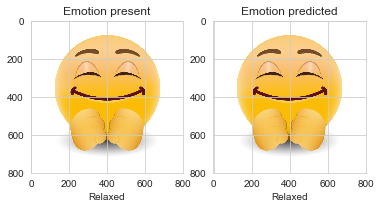

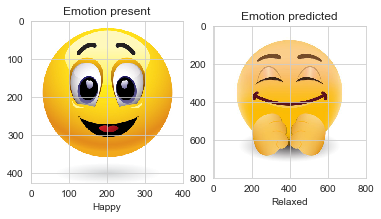

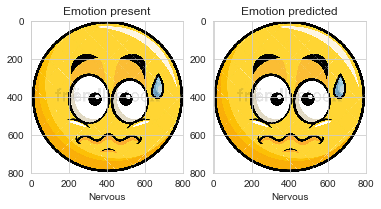

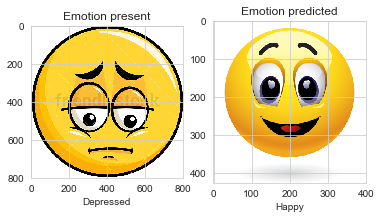

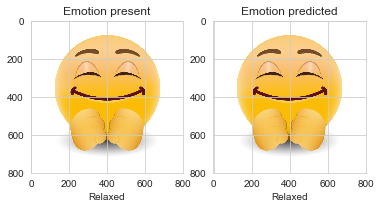

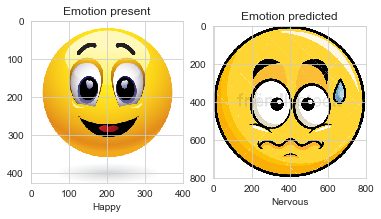

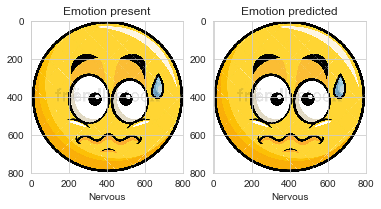

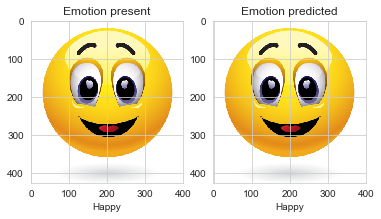

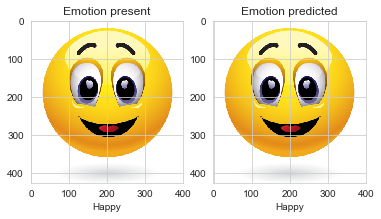

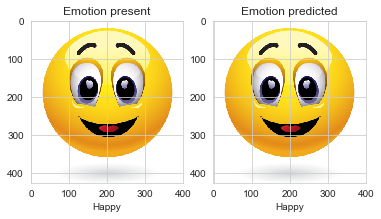

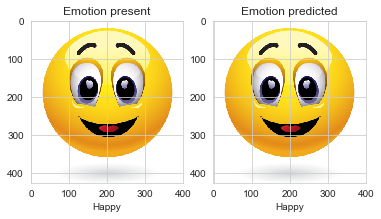

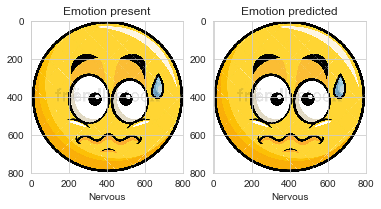

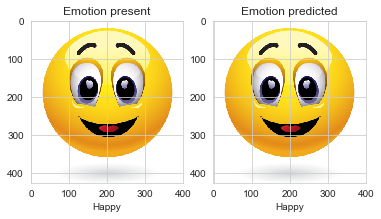

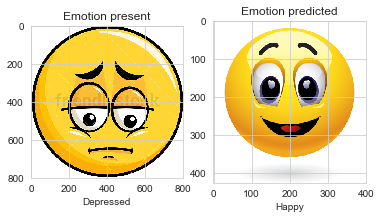

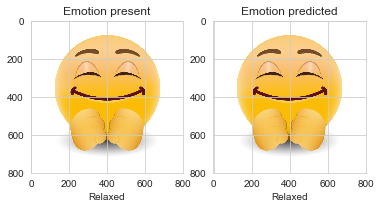

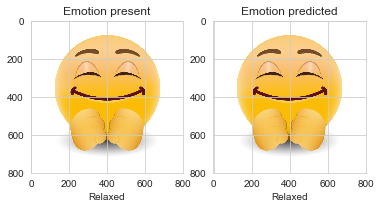

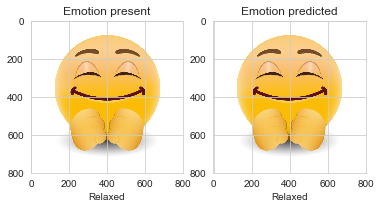

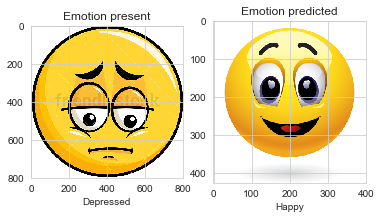

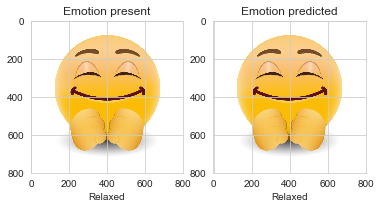

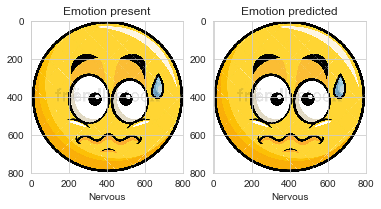

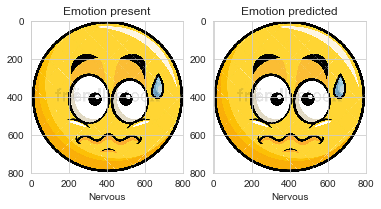

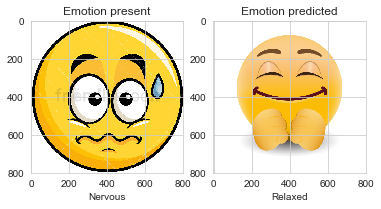

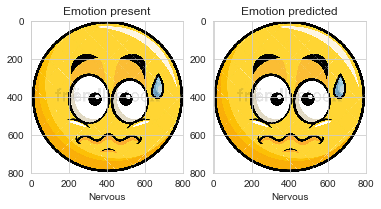

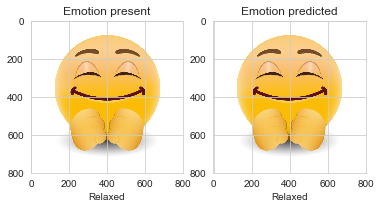

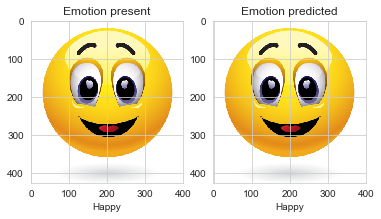

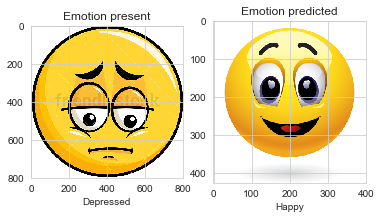

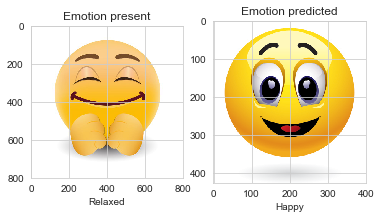

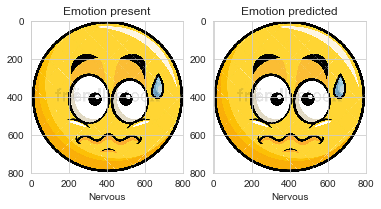

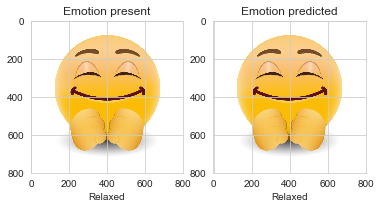

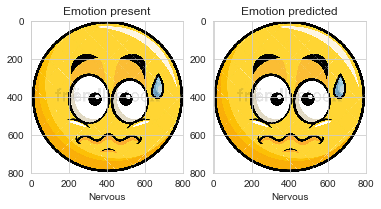

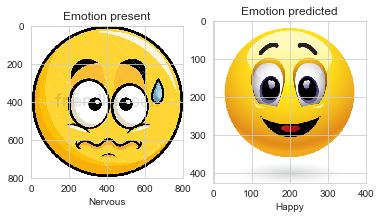

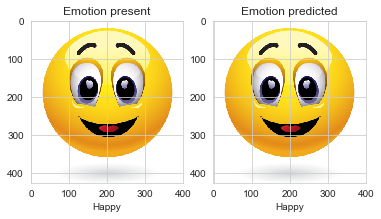

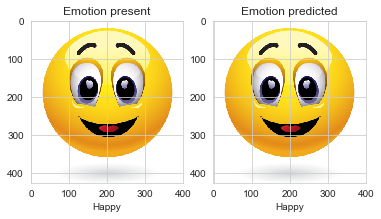

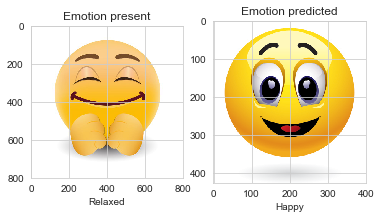

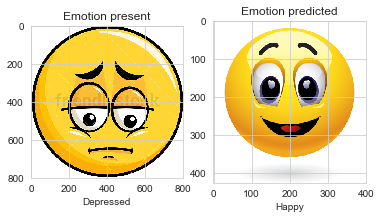

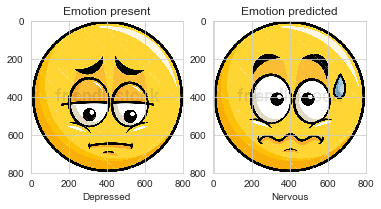

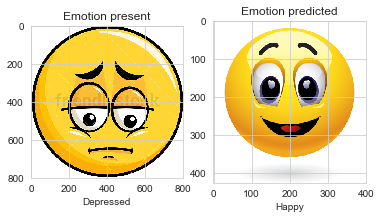

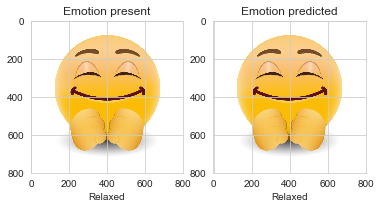

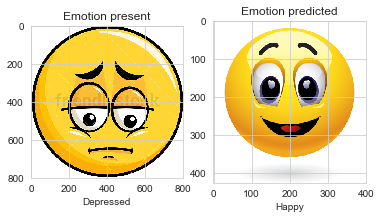

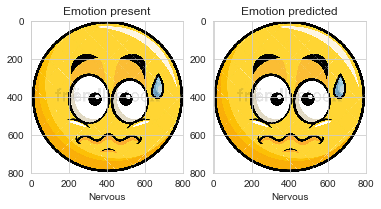

In [32]:
def Display_emotion():
    
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    
    eemotion_present=[]
    
    with open('data/emotion_present.dat','r') as f:
        for val in f:
            if str(val) == 'Relaxed\n':
                eemotion_present.append('Relaxed')
            elif str(val) == 'Happy\n':
                eemotion_present.append('Happy')
            elif str(val) == 'Depressed\n':
                eemotion_present.append('Depressed')
            else:
            
                eemotion_present.append('Nervous')
            
        
    f.close()
    
    eemotion_predicted=[]
    
    with open('data/emotion_predicted.dat','r') as f:
        for val in f:
            if str(val) == 'Relaxed\n':
                eemotion_predicted.append('Relaxed')
            elif str(val) == 'Happy\n':
                eemotion_predicted.append('Happy')
            elif str(val) == 'Depressed\n':
                eemotion_predicted.append('Depressed')
            else:
            
                eemotion_predicted.append('Nervous')
            
        
    f.close()
            
               
    img1 = mpimg.imread('image1.jpg')
    img2 = mpimg.imread('image2.jpg')
    img3 = mpimg.imread('image3.jpg')
    img4 = mpimg.imread('image4.jpg')
    
    plt.figure(1)
    
    
    for i in range(len(eemotion_present)):
        plt.subplot(121)
        if eemotion_present[i] == "Happy":
                   
            plt.imshow(img1)
            plt.title("Emotion present")
            plt.xlabel("Happy")
            
        elif eemotion_present[i] == "Nervous":
            plt.imshow(img2)
            plt.title("Emotion present")
            plt.xlabel("Nervous")
            
        elif eemotion_present[i] == "Depressed":
            plt.imshow(img3)
            plt.title("Emotion present")
            plt.xlabel("Depressed")
        
        else:
            plt.imshow(img4)
            plt.title("Emotion present")
            plt.xlabel("Relaxed")
            
             
        plt.subplot(122)
    
        if eemotion_predicted[i] == "Happy":
                   
            plt.imshow(img1)
            plt.title("Emotion predicted")
            plt.xlabel("Happy")
            
        elif eemotion_predicted[i] == "Nervous":
            plt.imshow(img2)
            plt.title("Emotion predicted")
            plt.xlabel("Nervous")
            
        elif eemotion_predicted[i] == "Depressed":
            plt.imshow(img3)
            plt.title("Emotion predicted")
            plt.xlabel("Depressed")
        
        else:
            plt.imshow(img4)
            plt.title("Emotion predicted")
            plt.xlabel("Relaxed")
    
        plt.show()

if __name__ == '__main__':
    Display_emotion()